In [1]:
"""
============================
Plotting NEAT Classifier
============================

An example plot of :class:`neuro_evolution._neat.NEATClassifier`
"""
from matplotlib import pyplot as plt
# from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from neuro_evolution import NEATClassifier
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import sys
import logging
from io import StringIO 
import re
import glob
import os
from os.path import dirname, basename, isfile, join

In [2]:
sys.path.append(os.getcwd()+"/Sklearn-neat")

import neat
from neat import math_util
from neat.puissance import Puissance 

In [3]:
neat.math_util.mean([5,2,4])

3.6666666666666665

In [4]:
class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X = np.append(x_train,x_test).reshape(60000,32,32,3)
y = np.append(y_train,y_test).reshape(60000,1)

assert X.shape == (60000, 32, 32, 3)
assert y.shape == (60000, 1)

In [6]:

#Transform (50000, 32, 32, 3) to (50000, 32, 32) with grayscaling.
# x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
# x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

#Preprocess the data
X = X.astype('float32')
X /= 255

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, 
                             test_size=0.0002, 
                             train_size=0.0002, 
                             random_state=0)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [48093  9803 26659 43338 44180 51523 18710 53793 39885 49231  9806  2128] TEST: [14856 15275 31434 47947 25917  5066   841 36690 57014 46225 56127 44327]
TRAIN: [26388 43834 52340 18482  3061 26549 33849 16855 11320 49735  9188 47962] TEST: [ 9941 41405 12326 42032 16005 46627 54866 29921 49630 26332 21829 17770]
TRAIN: [ 3717 41679 59177  3795 34353 53449 35354 17940 17588 59993 25303 59452] TEST: [57165 57427 10161 37000 36501  8154 21509 46268 44446  3328 58129 30380]
TRAIN: [53109 36718 50230 10039 10029  9903  4721 37819  1440 20407  8474 52362] TEST: [30537 29262 51315 52585  7090 59817 33987 44205  4947 16192 37981 17929]
TRAIN: [34368 13090 51681 58455  8036 11286  5697 15198 48070  6217 32912 13134] TEST: [ 3877 48548 17664 45418 41613 34458 51295 33566 15584 20466 11515 12843]


In [8]:
print(X_train.shape)
print(y_train.shape)

print("---")

print(X_test.shape)
print(y_test.shape)

(12, 32, 32, 3)
(12, 1)
---
(12, 32, 32, 3)
(12, 1)


In [9]:
def find_metric_in_output(output, string):    
    result = re.findall(r"\b"+string+r" ([0-9]+\.[0-9]+)\b", str(output))
    result = np.array(result).astype('float')
    result = result[0]
    
    return result

X_train_fl = X_train.reshape((X_train.shape[0], -1))
X_test_fl = X_test.reshape((X_test.shape[0], -1))

puissance_config = Puissance()

clf = NEATClassifier(number_of_generations=3,
                     fitness_threshold=0.5,
                     pop_size=5,
                     puissance_config = puissance_config)
results = {}
best_fitness = 0

# print("*** Running generation {} ***".format(str(i)))
# with Capturing() as output:
neat_genome = clf.fit(X_train_fl, y_train.ravel())

#     curr_fitness = find_metric_in_output(output, "Fitness:")
#     curr_popavgfit = find_metric_in_output(output, "Population's average fitness:")
#     curr_stdev = find_metric_in_output(output, "stdev:")

#     print("Fitness: {}".format(curr_fitness))
#     print("Population's average fitness: {}".format(curr_popavgfit))
#     print("Standard deviation: {}".format(curr_stdev))

# print("---")
# if curr_fitness > best_fitness:
#     best_fitness = curr_fitness

# print("Best fitness: {}".format(best_fitness))

# results[i] = {
#     "fitness":curr_fitness,
#     "pop_avg_fitness":curr_popavgfit,
#     "stdev":curr_stdev
# }
    

# print("---\n")


 ****** Running generation 0 ****** 

0.08333333333333333
0.16666666666666666
0.08333333333333333
0.0
0.08333333333333333
1
Population's average fitness: 0.08333 stdev: 0.05270
Best fitness: 0.16667 - size: (10, 30720) - species 1 - id 2
Currently reproducing
Average adjusted fitness: 0.083
Spawns: 

[5]
Mean genetic distance 0.383, standard deviation 0.272
Population of 5 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     5      0.2    0.083     0
Total extinctions: 0
Generation time: 16.423 sec

 ****** Running generation 1 ****** 

0.16666666666666666
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.08333333333333333
diff_fit_parent[cur]
0
cur_total_delta
0
cur_total_delta
0
Generation avg deltas
[0.0, 0.0]
Part for mu_p
[0.0]
Part for mu_ch
[0.0]
{49.45118836390597}
diff_fit_parent[cur]
0
cur_total_delta
0
cur_total_delta
0
Generation avg deltas
[0.0, 0.0]
Part for mu_p
[0.0]
Part for mu_ch
[0.0]
{

In [10]:
y_pred = neat_genome.predict(X_test_fl)

In [11]:
print(classification_report(y_test.ravel(), y_pred.ravel()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.08      1.00      0.15         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.08        12
   macro avg       0.01      0.10      0.02        12
weighted avg       0.01      0.08      0.01        12



/home/yvson/radboud-naco-project/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yvson/radboud-naco-project/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yvson/radboud-naco-project/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [12]:
results.items()

dict_items([])

FileNotFoundError: [Errno 2] No such file or directory: 'figures/fitness.png'

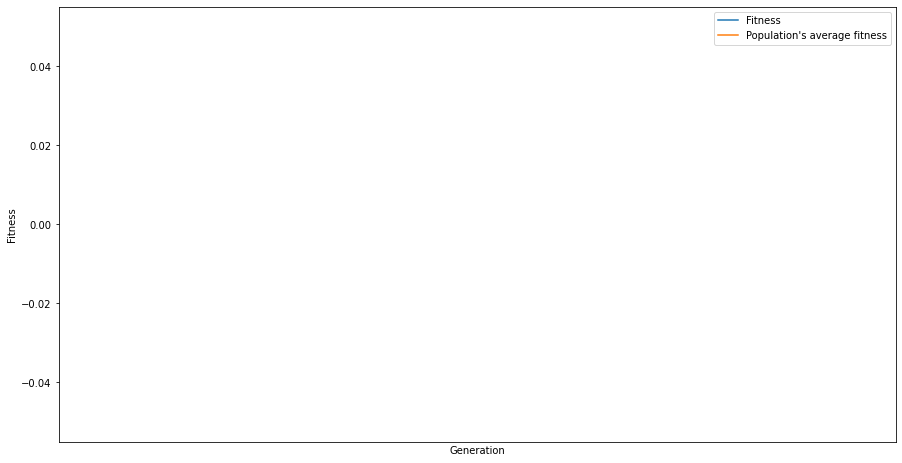

In [13]:
fitness = [i['fitness'] for i in results.values()]
pop_avg_fitness = [i['pop_avg_fitness'] for i in results.values()]

fig,ax = plt.subplots(figsize=(15,8))

plt.plot(np.linspace(1,len(fitness),len(fitness)),
         fitness,
         label="Fitness")
plt.plot(np.linspace(1,len(pop_avg_fitness),len(pop_avg_fitness)),
         pop_avg_fitness,
         label="Population's average fitness")

plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.legend()

plt.xticks(np.linspace(1,len(fitness),len(pop_avg_fitness)))

plt.savefig("figures/fitness.png")

plt.plot()

In [ ]:
stdev = [i['stdev'] for i in results.values()]

fig,ax = plt.subplots(figsize=(15,8))

plt.plot(np.linspace(1,len(stdev),len(stdev)),
         stdev,
         label="Standard deviation")

plt.xlabel("Generation")
plt.ylabel("Standard deviation")

plt.legend()

plt.xticks(np.linspace(1,len(stdev),len(stdev)))

plt.savefig("figures/stdev.png")

plt.plot()